### Import the required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the data

In [2]:
df = pd.read_csv("data-disasters.csv") # This data is from https://www.ncdc.noaa.gov

In [3]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


###  Let's create a new column total events

In [4]:
df['Total'] = df['drought'] + df['flooding'] + df['freeze'] + df['severe storm'] + df['tropical cyclone'] + df['wildfire'] + df['winter storm']

In [5]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Total
0,1980,AK,0,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0,1
2,1980,AR,1,1,0,0,0,0,0,2
3,1980,AZ,0,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0,0


### Find the top 10 states by billion dollar disaster events

In [6]:
total = df.groupby(['state'])['Total'].sum()
total.head()

state
AK     6
AL    69
AR    57
AZ    22
CA    33
Name: Total, dtype: int64

In [7]:
top10states = total.sort_values(ascending=False).head(10)
top10states

state
TX    95
OK    70
IL    70
AL    69
NC    68
GA    68
MS    66
TN    66
MO    64
VA    60
Name: Total, dtype: int64

### Let's plot the top 10 states

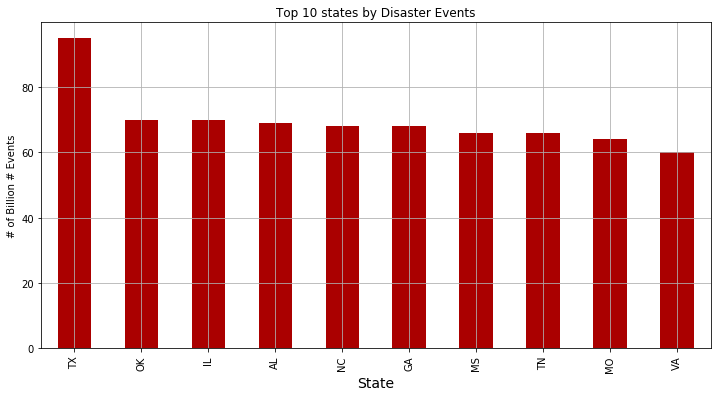

In [8]:
plt.figure(figsize=(12,6))
chart = top10states.plot(kind = "bar", facecolor='#AA0000', 
                title = 'Top 10 states by Disaster Events', grid = True);
chart.set_xlabel('State', fontsize=14);
chart.set_ylabel('# of Billion # Events');

### Billion dollar events over the years

In [19]:
total = df.groupby(['year'])['Total'].sum()
total.head(10)

year
1980    26
1981     5
1982    68
1983    65
1984    17
1985    51
1986    14
1987     0
1988    25
1989    49
Name: Total, dtype: int64

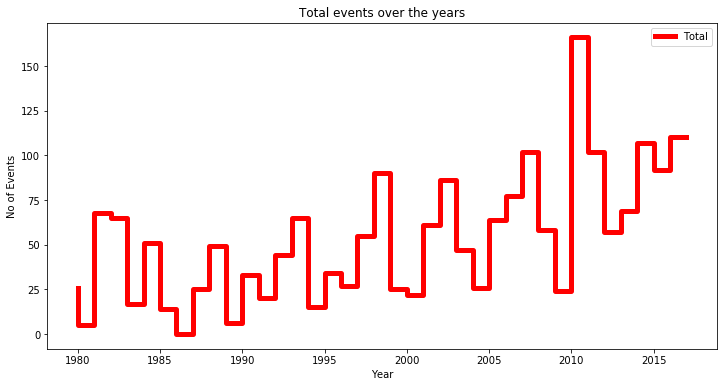

In [20]:
plt.figure(figsize=(12,6))
plt.plot(total, color='red', linewidth=5, linestyle='steps')
plt.xlabel('Year')
plt.ylabel('No of Events')
plt.title('Total events over the years')
plt.legend()
plt.show;